# Graph Theory
This notebook will construct a graph of the manager-employee relationships within a company using the [HR Dataset](https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/reinforcement%20learning/2%20-%20graph%20theory/HRDatasetGraphTheory.csv), which was originally found [here](https://www.kaggle.com/rhuebner/human-resources-data-set) on Kaggle. This dataset contains similar features to the one used in the remainder of the repository, but additionally contains names of employees and their managers which are useful for graphing. 

In [2]:
# Import the necessary python packages
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from pyvis.network import Network

#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/reinforcement%20learning/2%20-%20graph%20theory/HRDatasetGraphTheory.csv")

First, we check the size of the dataset. If there are too many entries, the graph will be difficult to read. Typically, we would also do other exploratory data analysis, but this dataset contains similar information to the other dataset used elsewhere in this repository, except that this one is smaller and has employee and manager names (which is the information we need to create a graph from the data).

In [3]:
shape = df.shape
print(shape)
df.head()

(311, 37)


,Employee_info,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adell Saada, Software Engineer",Adell Saada,10126,1,1,0,1,4,3,0,...,Alex Sweetwater,10.0,Indeed,Fully Meets,4.20,3,6,2/13/2019,0,2
1,"Andrew Szabo, Software Engineer",Andrew Szabo,10024,0,0,1,1,4,4,0,...,Alex Sweetwater,10.0,LinkedIn,Exceeds,4.50,5,5,2/18/2019,0,1
2,"Bosque Keyla Del Bosque, Software Engineer",Bosque Keyla Del Bosque,10155,0,0,0,1,4,3,0,...,Alex Sweetwater,10.0,CareerBuilder,Fully Meets,3.79,5,5,1/25/2019,0,8
3,"Colby Andreola, Software Engineer",Colby Andreola,10194,0,0,0,1,4,3,0,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
4,"Edward True, Software Engineer",Edward True,10102,0,0,1,5,4,3,1,...,Alex Sweetwater,10.0,Diversity Job Fair,Fully Meets,4.60,3,4,2/12/2017,0,9


Next, we create an instance of the graph object using NetworkX.

In [4]:
#Instantiate the graph
G = nx.Graph()

Then, we feed the graph a list of nodes and edges connecting them. In this case, the nodes will be "employee info", which contains the employee's name and position, and the edges will connect them with their managers.

In [5]:
nodes_list = df['Employee_info']
edges_raw = df[['Employee_info', 'ManagerName']]

for i in nodes_list:
    G.add_node(i)
    
for i in range(len(edges_raw)):
    emp_name = edges_raw['Employee_info'][i]
    mana_name = edges_raw['ManagerName'][i]
    G.add_edge(emp_name,mana_name)

Now, we can visualize the graph.

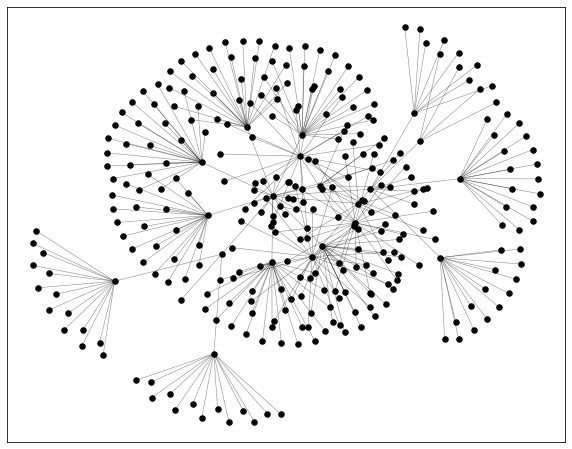

In [6]:
# Set your figure size
plt.figure(figsize=(10, 8))

# Set your pos
pos = nx.kamada_kawai_layout(G)

# Set your node options
node_options = {"node_color": "black", "node_size": 30}

# Set your edge options
edge_options = {"width": .50, "alpha": .5, "edge_color": "black"}

# Set your node label options
node_label_options = {"font_size": 5,
                      "font_color": "blue",
                      "verticalalignment": "bottom",
                      "horizontalalignment": "left"}

# Draw nodes
nx.draw_networkx_nodes(G, pos, **node_options)

# Draw edges
nx.draw_networkx_edges(G, pos, **edge_options)

plt.show()

As you can see, the graph largely stems from a single central node, with lots of branches coming off of it. That node is the CEO, Janet King. Because the above graph is a little difficult to do anything useful with, we will visualize the graph in a way that is more spread out, color coded, and highlights the nodes with the biggest degree (the managers that oversee the most people).

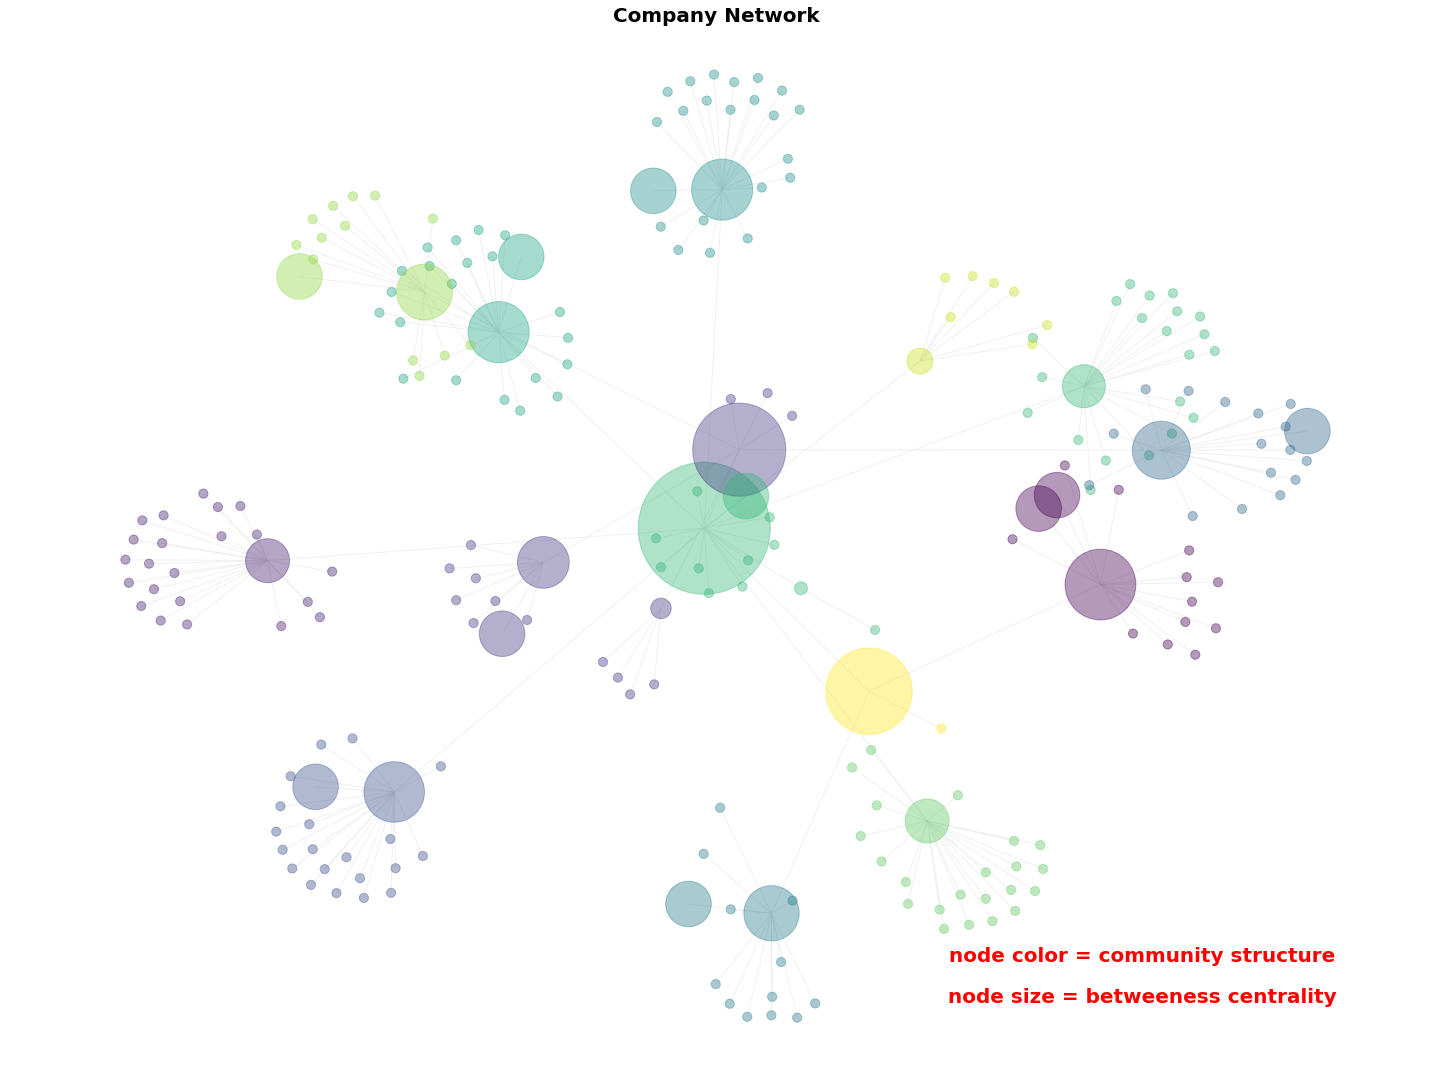

In [7]:
# largest connected component
components = nx.connected_components(G)
largest_component = max(components, key=len)
H = G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(H,
                pos=pos,
                with_labels=False,
                node_color=node_color,
                node_size=node_size,
                edge_color="gainsboro",
                alpha=0.4)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("Company Network", font)
# Change font color for legend
font["color"] = "r"

ax.text(0.80,
        0.10,
        "node color = community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font)
ax.text(0.80,
        0.06,
        "node size = betweeness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

We can also print a list of all the neighbors of each node to identify those nodes with the highest degree (the managers). 

In [8]:
for v in G.nodes:
    print(f" Neighbors of {v} = {list(nx.neighbors(G, v))} \n")

 Neighbors of Adell Saada, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Andrew Szabo, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Bosque Keyla Del Bosque, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Colby Andreola, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Edward True, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Judith Carabbio, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Lucas Patronick, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Sandra Martin, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Susan Exantus, Software Engineer = ['Alex Sweetwater'] 

 Neighbors of Alain Robinson, Production Technician I = ['Amy Dunn, Production Manager'] 

 Neighbors of Alexandra Kirill, Production Technician I = ['Amy Dunn, Production Manager'] 

 Neighbors of Barry Wilber, Production Technician I = ['Amy Dunn, Production Manager'] 

 Neighbors of Carl Desimone, Production Technician I = ['Amy Dunn, Production 

PyVis is another powerful visualization tool that allows for the creation of interactive graphs. The output for the cell below will open in a new window, and viewers will be able to move the nodes around and zoom in and out. Zooming in will reveal the employee's names and titles.

In [11]:
net = Network(notebook = True)

for i in nodes_list:
    net.add_node(i)

missing_managers = []
for i in df['ManagerName']:
    if i not in df['Employee_info']:
        net.add_node(i)        

for i in range(len(edges_raw)):
    emp_name = edges_raw['Employee_info'][i]
    mana_name = edges_raw['ManagerName'][i]
    net.add_edge(emp_name,mana_name)

net.show('nodes.html')

The graph contains one large branching structure, with a few smaller clusters on the sides. These smaller clusters were names who were only listed under the list of managers, but were not included in the list of employees (and therefore were missing information for who oversees them and their business titles). 

You can observe clusters for different groups in the company, like IT, Data Science, Network Engineering, and many production teams.